Train shape: (60000, 28, 28) (60000, 10)
Test shape: (10000, 28, 28) (10000, 10)
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7654 - loss: 0.7266 - val_accuracy: 0.9325 - val_loss: 0.2353
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9329 - loss: 0.2240 - val_accuracy: 0.9449 - val_loss: 0.1841
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9463 - loss: 0.1756 - val_accuracy: 0.9406 - val_loss: 0.1946
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9535 - loss: 0.1569 - val_accuracy: 0.9516 - val_loss: 0.1693
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9570 - loss: 0.1410 - val_accuracy: 0.9554 - val_loss: 0.1511
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9614 - loss: 0.1263 - val_accuracy: 0.9491 - val_loss: 0.1724
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9643 - loss: 0.1171 - val_accuracy: 0.9512 - val_loss: 0.1688
Epoch 8/1

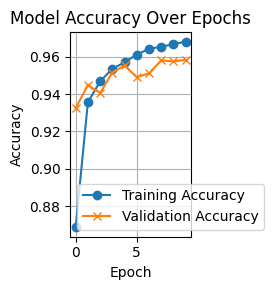

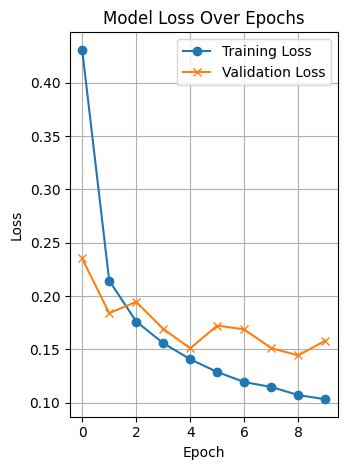

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


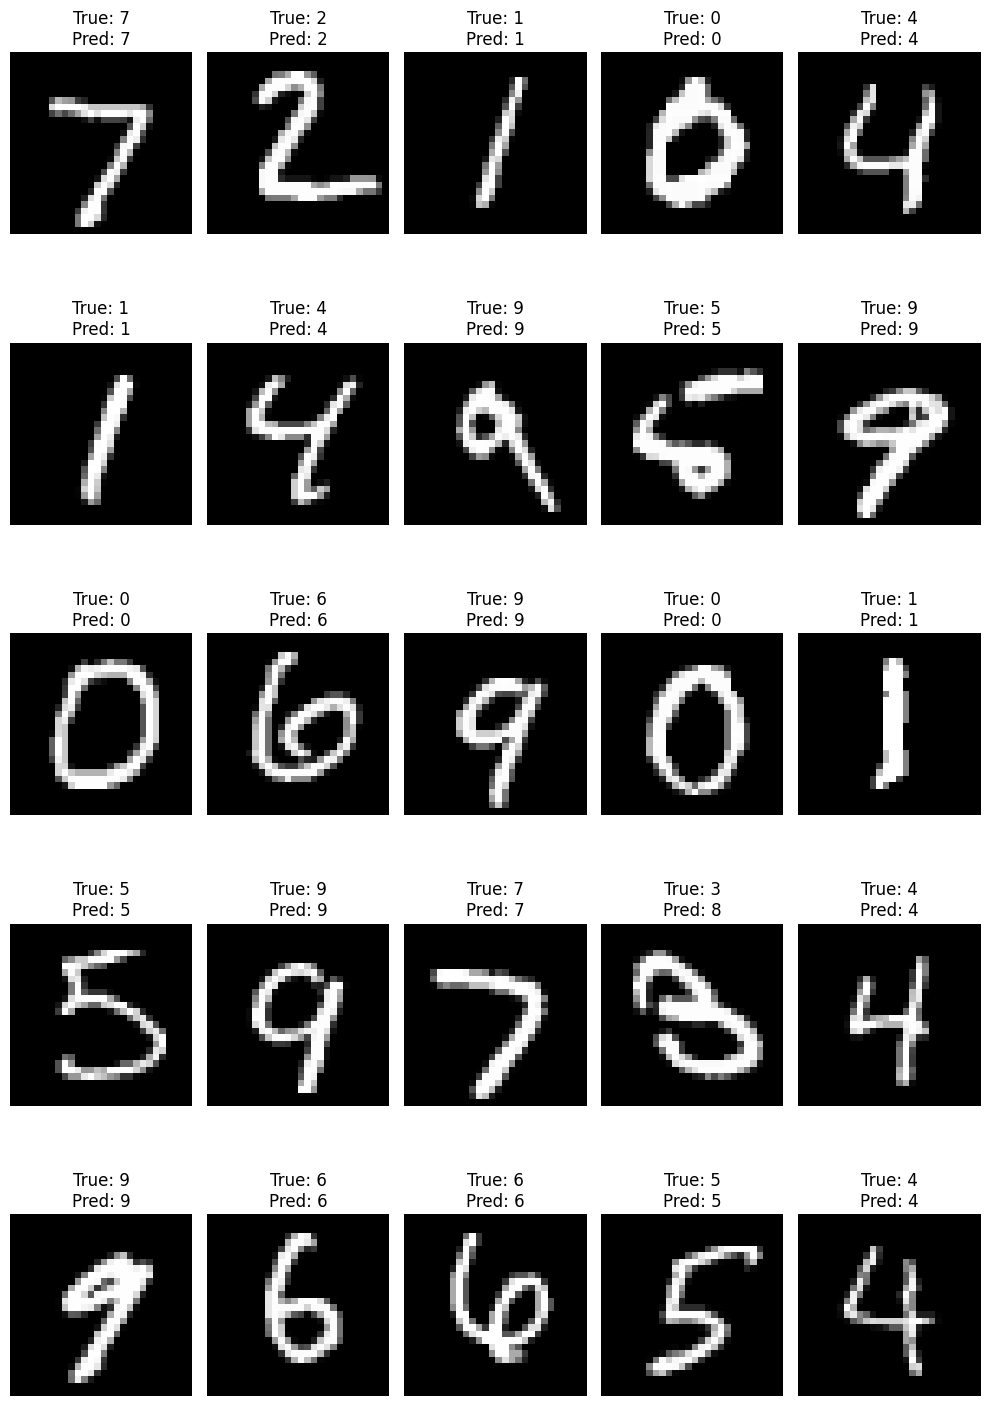

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

def main():
    (trainX, trainY), (testX, testY) = load_data()

    trainX = trainX.astype('float32') / 255.0
    testX = testX.astype('float32') / 255.0

    trainY_cat = to_categorical(trainY, num_classes=10)
    testY_cat = to_categorical(testY, num_classes=10)

    print("Train shape:", trainX.shape, trainY_cat.shape)
    print("Test shape:", testX.shape, testY_cat.shape)

    model = build_model()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


     # ✅ Train and capture history
    history = model.fit(trainX, trainY_cat, epochs=10, batch_size=32, validation_data=(testX, testY_cat))

    # ✅ Evaluate model
    loss, accuracy = model.evaluate(testX, testY_cat)
    print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
    plt.figure(figsize=(4, 3))
    # ✅ Plot accuracy and loss
    plot_accuracy(history)
    plot_loss(history)

    # ✅ Predictions
    predictions = model.predict(testX)
    predicted_classes = np.argmax(predictions, axis=1)
    actual_classes = testY

    plot_predictions(testX, actual_classes, predicted_classes)

def build_model():
    inputs = Input((28, 28))
    x = Flatten()(inputs)
    h1 = Dense(16, activation='relu')(x)
    h2 = Dense(32, activation='relu')(h1)
    h3 = Dense(64, activation='relu')(h2)
    h4 = Dense(128, activation='relu')(h3)
    h5 = Dense(64, activation='relu')(h4)
    h6 = Dense(32, activation='relu')(h5)
    h7 = Dense(16, activation='relu')(h6)
    outputs = Dense(10, activation='softmax')(h7)
    model = Model(inputs, outputs)
    return model

def plot_predictions(images, actual, predicted, num=25):
    plt.figure(figsize=(10, 15))
    for i in range(num):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"True: {actual[i]}\nPred: {predicted[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def plot_accuracy(history):

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
    plt.title('Model Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_loss(history):
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
    plt.title('Model Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    main()
